In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import gradio as gr
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
df=pd.read_csv('carprice.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,accident
0,Maruti_800_AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,At_least_1_accident_or_damage_reported
1,Maruti_Wagon_R_LXI_Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,At_least_1_accident_or_damage_reported
2,Hyundai_Verna_1.6_SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,None_reported
3,Datsun_RediGO_T_Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,None_reported
4,Honda_Amaze_VX_i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,None_reported


In [4]:
df.shape

(4340, 9)

In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
accident         113
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.owner.value_counts()

owner
First Owner             2763
Second Owner            1070
Third Owner              298
Fourth & Above Owner      80
Test Drive Car            16
Name: count, dtype: int64

In [8]:
df.replace({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':4},inplace=True)

In [9]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,accident
0,Maruti_800_AC,2007,60000,70000,Petrol,Individual,Manual,1,At_least_1_accident_or_damage_reported
1,Maruti_Wagon_R_LXI_Minor,2007,135000,50000,Petrol,Individual,Manual,1,At_least_1_accident_or_damage_reported
2,Hyundai_Verna_1.6_SX,2012,600000,100000,Diesel,Individual,Manual,1,None_reported
3,Datsun_RediGO_T_Option,2017,250000,46000,Petrol,Individual,Manual,1,None_reported
4,Honda_Amaze_VX_i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2,None_reported
...,...,...,...,...,...,...,...,...,...
4335,Hyundai_i20_Magna_1.4_CRDi_(Diesel),2014,409999,80000,Diesel,Individual,Manual,2,At_least_1_accident_or_damage_reported
4336,Hyundai_i20_Magna_1.4_CRDi,2014,409999,80000,Diesel,Individual,Manual,2,At_least_1_accident_or_damage_reported
4337,Maruti_800_AC_BSIII,2009,110000,83000,Petrol,Individual,Manual,2,At_least_1_accident_or_damage_reported
4338,Hyundai_Creta_1.6_CRDi_SX_Option,2016,865000,90000,Diesel,Individual,Manual,1,At_least_1_accident_or_damage_reported


In [10]:
df.accident.value_counts()

accident
None_reported                             2910
At_least_1_accident_or_damage_reported    1317
Name: count, dtype: int64

In [11]:
df.replace({'None_reported':0,'At_least_1_accident_or_damage_reported':1},inplace=True)

In [12]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,accident
0,Maruti_800_AC,2007,60000,70000,Petrol,Individual,Manual,1,1
1,Maruti_Wagon_R_LXI_Minor,2007,135000,50000,Petrol,Individual,Manual,1,1
2,Hyundai_Verna_1.6_SX,2012,600000,100000,Diesel,Individual,Manual,1,0
3,Datsun_RediGO_T_Option,2017,250000,46000,Petrol,Individual,Manual,1,0
4,Honda_Amaze_VX_i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2,0
...,...,...,...,...,...,...,...,...,...
4335,Hyundai_i20_Magna_1.4_CRDi_(Diesel),2014,409999,80000,Diesel,Individual,Manual,2,1
4336,Hyundai_i20_Magna_1.4_CRDi,2014,409999,80000,Diesel,Individual,Manual,2,1
4337,Maruti_800_AC_BSIII,2009,110000,83000,Petrol,Individual,Manual,2,1
4338,Hyundai_Creta_1.6_CRDi_SX_Option,2016,865000,90000,Diesel,Individual,Manual,1,1


In [13]:
cat_cols=df.select_dtypes(include='object')
num_cols=df.select_dtypes(exclude='object')

In [14]:
for col in cat_cols:
    cat_cols[col] = cat_cols[col].astype(str)
    cat_cols[col].fillna(cat_cols[col].mode()[0],inplace=True)

In [15]:
for col in num_cols:
    num_cols[col].fillna(num_cols[col].mode()[0],inplace=True)

In [16]:
df=pd.concat([cat_cols,num_cols],axis=1)

In [17]:
label_encoders = {}
for column in ['name','fuel','seller_type','transmission']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [18]:
df

,name,fuel,seller_type,transmission,year,selling_price,km_driven,owner,accident
0,769,4,1,1,2007,60000,70000,1,1
1,1028,4,1,1,2007,135000,50000,1,1
2,502,1,1,1,2012,600000,100000,1,0
3,117,4,1,1,2017,250000,46000,1,0
4,274,1,1,1,2014,450000,141000,2,0
...,...,...,...,...,...,...,...,...,...
4335,599,1,1,1,2014,409999,80000,2,1
4336,598,1,1,1,2014,409999,80000,2,1
4337,771,4,1,1,2009,110000,83000,2,1
4338,378,1,1,1,2016,865000,90000,1,1


In [19]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [21]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
y_pred

array([ 309600.        ,   95191.11      ,  325009.92      ,
        599399.99      ,  331449.97      ,  114630.        ,
         82844.98      ,  146639.99      ,  498439.99      ,
        802930.        ,  148160.        ,  183729.98      ,
        425749.93      ,  241840.        , 1426990.        ,
        191899.99      ,  151799.98      ,  390062.5       ,
        407550.        ,  191399.67      ,  803800.        ,
        662349.98      ,  262300.        ,  565049.97      ,
        498800.        ,  506850.        ,  145249.98      ,
        124350.        ,  733260.        ,  835700.        ,
        409500.        ,  305219.98      ,  431629.99      ,
        275939.85      ,  388600.        ,  550000.        ,
        163220.        , 4950000.        ,  475039.78      ,
        858649.99      ,  168800.        ,  138250.        ,
        578500.        ,  315520.        ,  287130.        ,
        277899.97      ,   96240.        ,  385630.        ,
        987250.        ,

In [23]:
import joblib

# Save the trained model
joblib.dump(model, 'cars.pkl')

['cars.pkl']

In [24]:
df.head()

,name,fuel,seller_type,transmission,year,selling_price,km_driven,owner,accident
0,769,4,1,1,2007,60000,70000,1,1
1,1028,4,1,1,2007,135000,50000,1,1
2,502,1,1,1,2012,600000,100000,1,0
3,117,4,1,1,2017,250000,46000,1,0
4,274,1,1,1,2014,450000,141000,2,0


In [27]:
import gradio as gr
import pandas as pd
import joblib  # or import pickle if using pickle

model = joblib.load('cars.pkl')


def predict_weather(name,fuel,seller_type,transmission,year,km_driven,owner,accident):
    input_data = pd.DataFrame({
        'name': [label_encoders['name'].transform([name])[0]],
        'fuel': [label_encoders['fuel'].transform([fuel])[0]],
        'seller_type': [label_encoders['seller_type'].transform([seller_type])[0]],
        'transmission': [label_encoders['transmission'].transform([transmission])[0]],
        'year': [int(year)],
        'km_driven': [int(km_driven)],
        'owner': [int(owner)],
        'accident': [int(accident)]
    })
    
    prediction = model.predict(input_data)
    return prediction[0]

iface = gr.Interface(
    fn=predict_weather,
    inputs=[
        gr.Textbox(label='name'),
        gr.Textbox(label='fuel'),
        gr.Textbox(label='seller_type'),
        gr.Textbox(label='transmission'),
        gr.Textbox(label='year'),
        gr.Textbox(label='km_driven'),
        gr.Textbox(label='owner'),
        gr.Textbox(label='accident')
    ],
    outputs=gr.Textbox(label="Predicted Class"),
    title="AirfarePredictor",
    description="Predict the pricing of an Airline based on its characteristics."
)

iface.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [28]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10  
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0]) 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [30]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.012952937284778945
Root Mean Squared Error (RMSE): 0.11381097172407828
Mean Absolute Error (MAE): 0.07691369159107966
R-squared (R²): 0.9656502852203311


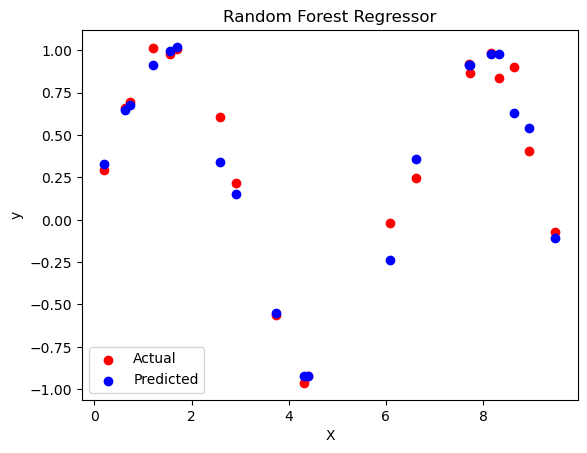

In [40]:
plt.scatter(X_test, y_test, color="red", label="Actual")
plt.scatter(X_test, y_pred, color="blue", label="Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Random Forest Regressor")
plt.legend()
plt.show()